In [1]:
import numpy as np

In [2]:
V = [0, 1, 2, 3, 4]

# each tuple(u,v) represent edge from u to v
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

In [3]:
size = len(V)

In [4]:
adjacency_matrix = np.zeros(shape=(size, size))

In [5]:
for i, j in E:
  adjacency_matrix[i, j] = 1

In [6]:
adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [7]:
adjacency_list = {i: [] for i in range(size)}

In [8]:
for i, j in E:
  adjacency_list[i].append(j)

In [9]:
adjacency_list

{0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

# For unweighted undirected graph

In [10]:
V = [0, 1, 2, 3, 4]

E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

In [11]:
E += [(j, i) for (i, j) in E]
size = len(V)

In [12]:
adjacency_matrix = np.zeros(shape=(size, size))
for (i, j) in E:
  adjacency_matrix[i, j] = 1

adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0.]])

In [13]:
adjacency_list = {i: [] for i in range(size)}

for i, j in E:
  adjacency_list[i].append(j)

adjacency_list

{0: [1, 2], 1: [3, 4, 0], 2: [4, 3, 0], 3: [4, 1, 2], 4: [1, 2, 3]}

# Queue Implementation

In [14]:
class Queue:
  def __init__(self):
    self.queue = []

  def isEmpty(self):
    return len(self.queue) == 0

  def enqueue(self, value):
    self.queue.append(value)

  def dequeue(self):
    value = None
    if not self.isEmpty():
      value = self.queue[0]
      self.queue = self.queue[1:]

    return value

  def __str__(self):
    return str(self.queue)


q = Queue()
q.enqueue(10)
q.enqueue(20)
q.enqueue(30)
print(q.dequeue())
print(q)

q.enqueue(40)
print(q.dequeue())
print(q)

print(q.dequeue())
print(q.dequeue())
print(q.dequeue())

10
[20, 30]
20
[30, 40]
30
40
None


# BFS Implementation For Adjacency list

In [15]:
def bfs_adjacency_list(adjacency_list, start_vertex):
  visited = {
      i: False for i in adjacency_list.keys()
  }

  q = Queue()

  visited[start_vertex] = True
  q.enqueue(start_vertex)

  while not q.isEmpty():
    curr_vertex = q.dequeue()
    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        q.enqueue(adj_vertex)
        visited[adj_vertex] = True

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_adjacency_list(adjacency_list=adjacency_list, start_vertex=0)

{0: True, 1: True, 2: True, 3: True, 4: True}

# BFS Implementation for adjacency matrix of graph

In [16]:
def neighbors(adjacency_matrix, vertex):
  row = adjacency_matrix[vertex]
  return [i for i in range(len(row)) if row[i] == 1]


def bfs_adjacency_matrix(adjacency_matrix, start_vertex):
  visited = {i: False for i in range(len(adjacency_matrix[0]))}

  q = Queue()

  visited[start_vertex] = True
  q.enqueue(start_vertex)

  while not q.isEmpty():
    curr_vertex = q.dequeue()
    for adj_vertex in neighbors(adjacency_matrix=adjacency_matrix, vertex=curr_vertex):
      if not visited[adj_vertex]:
        q.enqueue(adj_vertex)
        visited[adj_vertex] = True

  return visited


V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))

for i, j in E:
  adjacency_matrix[i, j] = 1

bfs_adjacency_matrix(adjacency_matrix=adjacency_matrix, start_vertex=0)

{0: True, 1: True, 2: True, 3: True, 4: True}

# Find parent of each vertex using BFS

In [17]:
def bfs_adjacency_list_parent(adjacency_list, start_vertex):
  visited = {i: False for i in adjacency_list.keys()}
  parents = {i: -1 for i in adjacency_list.keys()}

  q = Queue()

  visited[start_vertex] = True
  q.enqueue(start_vertex)

  while not q.isEmpty():
    curr_vertex = q.dequeue()
    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        q.enqueue(adj_vertex)
        visited[adj_vertex] = True
        parents[adj_vertex] = curr_vertex

  return visited, parents


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print(bfs_adjacency_list_parent(adjacency_list=adjacency_list, start_vertex=0))

print(({0: True, 1: True, 2: True, 3: True, 4: True},
      {0: -1, 1: 0, 2: 0, 3: 1, 4: 1}))

({0: True, 1: True, 2: True, 3: True, 4: True}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})
({0: True, 1: True, 2: True, 3: True, 4: True}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})


# Find level number of vertices using BFS

Maintain level information to record length of the shortest path, in terms of number of edges or vertex.

In [18]:
def bfs_adjacency_list_level(adjacency_list, start_vertex):
  levels = {i: -1 for i in adjacency_list.keys()}
  parents = {i: -1 for i in adjacency_list.keys()}

  q = Queue()

  levels[start_vertex] = 0
  q.enqueue(start_vertex)

  while not q.isEmpty():
    curr_vertex = q.dequeue()
    for adj_vertex in adjacency_list[curr_vertex]:
      if levels[adj_vertex] == -1:
        q.enqueue(adj_vertex)
        levels[adj_vertex] = levels[curr_vertex] + 1
        parents[adj_vertex] = curr_vertex

  return levels, parents


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print(bfs_adjacency_list_level(adjacency_list=adjacency_list, start_vertex=0))
print(({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1}))

({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})
({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})


# Stack Implementation

In [19]:
class Stack:
  def __init__(self):
    self.stack = []

  def isEmpty(self):
    return len(self.stack) == 0

  def push(self, value):
    self.stack.append(value)

  def pop(self):
    value = None
    if not self.isEmpty():
      value = self.stack.pop()
    return value

  def __str__(self):
    return str(self.stack)


s = Stack()
s.push(10)
s.push(20)
s.push(30)

print(s.pop())
print(s.pop())
print(s)

s.push(40)
print(s.pop())
print(s)

print(s.pop())
print(s.pop())

30
20
[10]
40
[10]
10
None


# Depth First Search(DFS)

In [20]:
def dfs_adjacency_list(adjacency_list, start_vertex):
  visited = {i: False for i in adjacency_list.keys()}

  s = Stack()

  s.push(start_vertex)

  while not s.isEmpty():
    curr_vertex = s.pop()

    if visited[curr_vertex] == False:
      visited[curr_vertex] = True
      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          s.push(adj_vertex)

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print(dfs_adjacency_list(adjacency_list, 0))

{0: True, 1: True, 2: True, 3: True, 4: True}


# DFS Recursive (without using external stack)

In [21]:
def dfs_adjacency_list(adjacency_list, vertex, visited=None, parents=None):
  if visited == None:
    visited = {i: False for i in adjacency_list.keys()}

  if parents == None:
    parents = {i: -1 for i in adjacency_list.keys()}

  visited[vertex] = True

  for adj_vertex in adjacency_list[vertex]:
    if not visited[adj_vertex]:
      parents[adj_vertex] = vertex
      visited, parents = dfs_adjacency_list(
          adjacency_list=adjacency_list, vertex=adj_vertex, visited=visited, parents=parents)

  return visited, parents


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print(dfs_adjacency_list(adjacency_list=adjacency_list, vertex=0))
print(({0: True, 1: True, 2: True, 3: True, 4: True},
      {0: -1, 1: 0, 2: 0, 3: 1, 4: 3}))

({0: True, 1: True, 2: True, 3: True, 4: True}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 3})
({0: True, 1: True, 2: True, 3: True, 4: True}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 3})


# Find Connected Components in graph using BFS

In [35]:
def find_connected_components(adjacency_list):
  components = {i: -1 for i in adjacency_list}

  component_id, seen = 0, 0
  size = len(adjacency_list)

  while seen < size:
    start = None
    for vertex in adjacency_list:
      if components[vertex] == -1:
        start = vertex
        break

    visited = bfs_adjacency_list(
        adjacency_list=adjacency_list, start_vertex=start)

    for vertex in visited:
      if visited[vertex]:
        components[vertex] = component_id
        seen += 1

    component_id += 1

  return components


adjacency_list = {0: [1], 1: [2], 2: [0], 3: [4, 6], 4: [
    3, 7], 5: [3, 7], 6: [5], 7: [4, 8], 8: [5, 9], 9: [8]}
print(find_connected_components(adjacency_list=adjacency_list))
print({0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}


# Pre and Post numbering using DFS

https://www.geeksforgeeks.org/printing-pre-and-post-visited-times-in-dfs-of-a-graph/

Depth First Search (DFS) marks all the vertices of a graph as visited. So for making DFS useful, some additional information can also be stored. For instance, the order in which the vertices are visited while running DFS. 

Pre-visit and Post-visit numbers are the extra information that can be stored while running a DFS on a graph and which turns out to be really useful. Pre-visit number tells the time at which the node gets into the recursion stack and Post-visit number tells the time at which the node comes out from recursion stack of DFS.


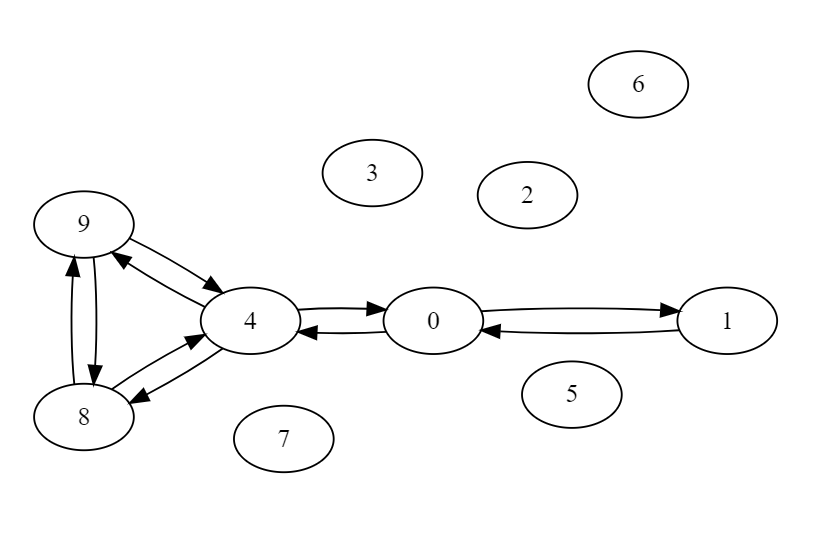

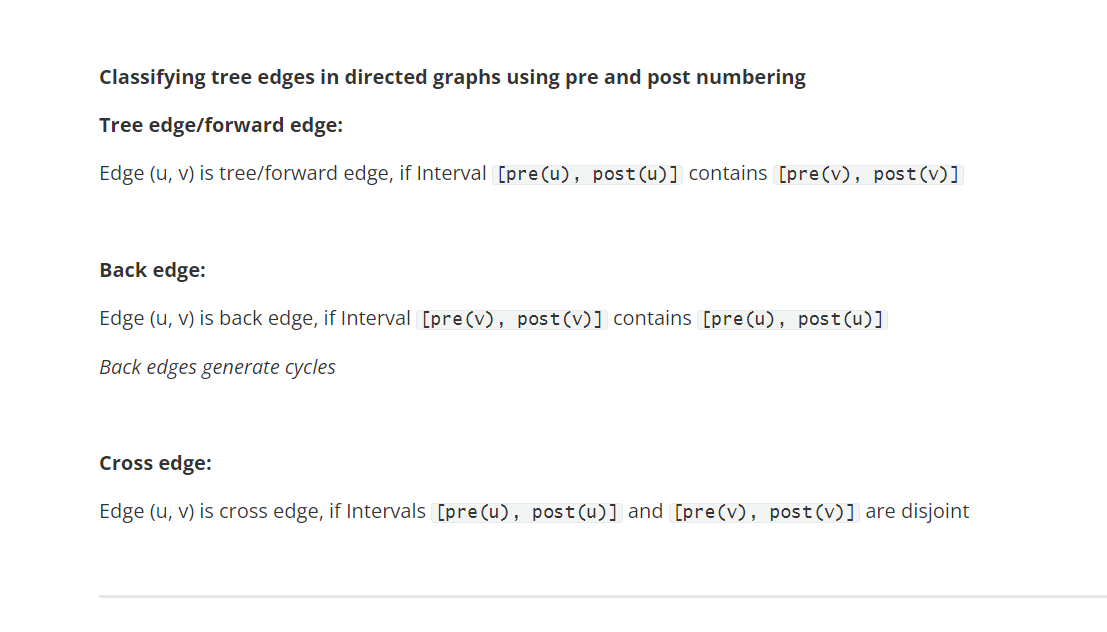

In [47]:
def dfs_pre_post_numbering(adjacency_list, vertex, count, visited=None, pre=None, post=None):
  if visited == None:
    visited = {i: False for i in adjacency_list}
    pre = {i: -1 for i in adjacency_list}
    post = {i: -1 for i in adjacency_list}

  visited[vertex] = True

  pre[vertex] = count
  count = count + 1

  for adj_vertex in adjacency_list[vertex]:
    if not visited[adj_vertex]:
      (count, *_) = dfs_pre_post_numbering(
          adjacency_list=adjacency_list, vertex=adj_vertex, count=count, visited=visited, pre=pre, post=post)

  post[vertex] = count
  count = count + 1

  return count, visited, pre, post


adjacency_list = {0: [1, 4], 1: [0], 2: [], 3: [], 4: [
    0, 8, 9], 5: [], 6: [], 7: [], 8: [4, 9], 9: [8, 4]}
count, visited, pre, post = dfs_pre_post_numbering(
    adjacency_list=adjacency_list, vertex=0, count=0)


print(count)
print(visited)
print(pre)
print(post)

print(count == (10))
print(visited == ({0: True, 1: True, 2: False, 3: False,
      4: True, 5: False, 6: False, 7: False, 8: True, 9: True}))
print(pre == ({0: 0, 1: 1, 2: -1, 3: -1,
      4: 3, 5: -1, 6: -1, 7: -1, 8: 4, 9: 5}))
print(post == ({0: 9, 1: 2, 2: -1, 3: -1,
      4: 8, 5: -1, 6: -1, 7: -1, 8: 7, 9: 6}))

10
{0: True, 1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: True}
{0: 0, 1: 1, 2: -1, 3: -1, 4: 3, 5: -1, 6: -1, 7: -1, 8: 4, 9: 5}
{0: 9, 1: 2, 2: -1, 3: -1, 4: 8, 5: -1, 6: -1, 7: -1, 8: 7, 9: 6}
True
True
True
True


In [48]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
count, visited, pre, post = dfs_pre_post_numbering(
    adjacency_list=adjacency_list, vertex=0, count=0)


print(count)
print(visited)
print(pre)
print(post)

10
{0: True, 1: True, 2: True, 3: True, 4: True}
{0: 0, 1: 1, 2: 7, 3: 2, 4: 3}
{0: 9, 1: 6, 2: 8, 3: 5, 4: 4}


# Directed Acyclic Graph(DAG)

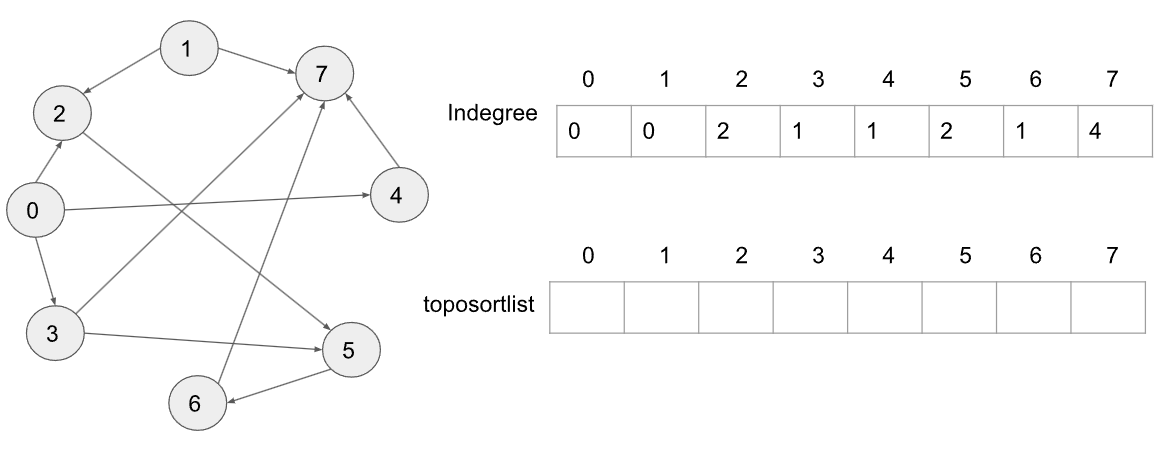

# Topological Sort for Adjacency list

In [78]:
def topological_sort_adjacency_list(adjacency_list):
  in_degrees = {i: 0 for i in adjacency_list}

  for vertex in adjacency_list:
    for vertex in adjacency_list[vertex]:
      in_degrees[vertex] += 1

  sorted_vertices = []
  zero_degree_q = Queue()

  for vertex in in_degrees:
    if in_degrees[vertex] == 0:
      zero_degree_q.enqueue(vertex)

  while not zero_degree_q.isEmpty():
    curr_vertex = zero_degree_q.dequeue()
    sorted_vertices.append(curr_vertex)
    in_degrees[curr_vertex] = in_degrees[curr_vertex] - 1

    for adj_vertex in adjacency_list[curr_vertex]:
      in_degrees[adj_vertex] = in_degrees[adj_vertex] - 1
      if in_degrees[adj_vertex] == 0:
        zero_degree_q.enqueue(adj_vertex)

  return sorted_vertices


adjacency_list = {0: [2, 3, 4], 1: [2, 7], 2: [
    5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
sorted_vertices = topological_sort_adjacency_list(
    adjacency_list=adjacency_list)
print(sorted_vertices)
print([0, 1, 3, 4, 2, 5, 6, 7] == sorted_vertices)

[0, 1, 3, 4, 2, 5, 6, 7]
True


# Topological Sort for Adjacency matrix

In [111]:
def topological_sort_adjacency_matrix(adjacency_matrix):
  rows, cols = adjacency_matrix.shape
  in_degrees = {}

  for i in range(rows):
    in_degrees[i] = 0
    for j in range(cols):
      if adjacency_matrix[j, i] == 1:
        in_degrees[i] += 1

  sorted_vertices = []

  for i in range(rows):
    j = min([k for k in range(cols) if in_degrees[k] == 0])
    sorted_vertices.append(j)
    in_degrees[j] = in_degrees[j] - 1

    for k in range(cols):
      if adjacency_matrix[j, k] == 1:
        in_degrees[k] = in_degrees[k] - 1

  return sorted_vertices


edges = [(0, 2), (0, 3), (0, 4), (1, 2), (1, 7), (2, 5),
         (3, 5), (3, 7), (4, 7), (5, 6), (6, 7)]
size = 8
adjacency_matrix = np.zeros(shape=(size, size))
for (i, j) in edges:
  adjacency_matrix[i, j] = 1


adjacency_matrix
sorted_vertices = topological_sort_adjacency_matrix(adjacency_matrix)
print(sorted_vertices)
print(sorted_vertices == [0, 1, 2, 3, 4, 5, 6, 7])

array([[0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

[0, 1, 2, 3, 4, 5, 6, 7]
True


# Longest Path in DAG

In [121]:
def longest_path_adjacency_list(adjacency_list):
  longest_path = {i: 0 for i in adjacency_list}

  in_degrees = {i: 0 for i in adjacency_list}
  for vertex in adjacency_list:
    for vertex in adjacency_list[vertex]:
      in_degrees[vertex] += 1

  zero_degree_q = Queue()

  for vertex in in_degrees:
    if in_degrees[vertex] == 0:
      zero_degree_q.enqueue(vertex)

  while not zero_degree_q.isEmpty():
    curr_vertex = zero_degree_q.dequeue()
    in_degrees[curr_vertex] = in_degrees[curr_vertex] - 1

    for adj_vertex in adjacency_list[curr_vertex]:
      in_degrees[adj_vertex] = in_degrees[adj_vertex] - 1

      longest_path[adj_vertex] = max(
          longest_path[adj_vertex], longest_path[curr_vertex]+1)

      if in_degrees[adj_vertex] == 0:
        zero_degree_q.enqueue(adj_vertex)

  return longest_path


adjacency_list = {0: [2, 3, 4], 1: [2, 7], 2: [
    5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
longest_path = longest_path_adjacency_list(adjacency_list)
print(longest_path)
print(longest_path == {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4})

{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4}
True
